#### Instruction (Read this)
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- But remove <b>unnecessary</b> cells to ensure the notebook is readable.
- Marks will be <b>deducted</b> if the notebook is cluttered or difficult to follow due to excess or irrelevant content.
- <b>Briefly</b> describe the steps in the "Description:" field.
- <b>Do not</b> submit the dataset. 
- The submitted jupyter notebook will be executed using the uploaded dataset in eLearn.

#### Group Information

Group No: Seismic 6

- Member 1: Lim Wen Hao
- Member 2: Goey Chew Hong
- Member 3: Lim Cong Sheng
- Member 4: Tan Jun Cheng


#### Import libraries

In [1]:
%config Completer.use_jedi=False # comment if not needed

# Import necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import necessary libraries for Feature Selection and Sampling
from imblearn.over_sampling import SMOTE # for oversampling
from collections import Counter # for counting


%matplotlib inline

#### Load the dataset

From the dataset README documentation, 

**Attribute information:**
1. `seismic`: result of shift seismic hazard assessment in the mine working obtained by the seismic method (a - lack of hazard, b - low hazard, c - high hazard, d - danger state);
2. `seismoacoustic`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;
3. `shift`: information about type of a shift (W - coal-getting, N -preparation shift);
4. `genergy`: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall;
5. `gpuls`: a number of pulses recorded within previous shift by GMax;
6. `gdenergy`: a deviation of energy recorded within previous shift by GMax from average energy recorded during eight previous shifts;
7. `gdpuls`: a deviation of a number of pulses recorded within previous shift by GMax from average number of pulses recorded during eight previous shifts;
8. `ghazard`: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming form GMax only;
9. `nbumps`: the number of seismic bumps recorded within previous shift;
10. `nbumps2`: the number of seismic bumps (in energy range [10^2,10^3)) registered within previous shift;
11. `nbumps3`: the number of seismic bumps (in energy range [10^3,10^4)) registered within previous shift;
12. `nbumps4`: the number of seismic bumps (in energy range [10^4,10^5)) registered within previous shift;
13. `nbumps5`: the number of seismic bumps (in energy range [10^5,10^6)) registered within the last shift;
14. `nbumps6`: the number of seismic bumps (in energy range [10^6,10^7)) registered within previous shift;
15. `nbumps7`: the number of seismic bumps (in energy range [10^7,10^8)) registered within previous shift;
16. `nbumps89`: the number of seismic bumps (in energy range [10^8,10^10)) registered within previous shift;
17. `energy`: total energy of seismic bumps registered within previous shift;
18. `maxenergy`: the maximum energy of the seismic bumps registered within previous shift;
19. `class`: the decision attribute - "1" means that high energy seismic bump occurred in the next shift 

In [2]:
df = pd.read_csv("seismic-bumps.csv")
df.sample(10)

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
71,a,a,N,75930,305,-38,-27,a,1,0,1,0,0,0,0,0,6000,6000,0
939,a,a,N,13960,36,-85,-74,a,0,0,0,0,0,0,0,0,0,0,0
355,b,a,W,358490,1231,-36,-58,a,1,1,0,0,0,0,0,0,400,400,0
1235,b,a,W,15600,274,-39,-30,a,0,0,0,0,0,0,0,0,0,0,0
1335,a,b,W,28920,659,114,96,b,0,0,0,0,0,0,0,0,0,0,0
30,a,a,W,395110,1043,46,40,a,3,0,3,0,0,0,0,0,6000,2000,0
1248,a,a,N,7120,227,-23,2,a,0,0,0,0,0,0,0,0,0,0,0
1842,b,b,W,23050,428,-19,-32,b,0,0,0,0,0,0,0,0,0,0,0
2373,a,a,W,9160,300,-72,-28,a,0,0,0,0,0,0,0,0,0,0,0
2055,b,a,W,27480,441,-21,-18,a,1,0,1,0,0,0,0,0,4000,4000,0


From the sample we got, `class` column consists only 0 and 1 which is the target label column.

In [3]:
# Summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [4]:
# Check for missing values
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

From the summary we get,
1. No null values found in all columns
2. There are 19 columns and 2584 records found in the dataset.

In [5]:
# Set the target variable
label = "class"
df[label].value_counts()

class
0    2414
1     170
Name: count, dtype: int64

In [6]:
# Categorize the column based on data types
categorical_df = df.select_dtypes(include='object')
categorical_df.head()

,seismic,seismoacoustic,shift,ghazard
0,a,a,N,a
1,a,a,N,a
2,a,a,N,a
3,a,a,N,a
4,a,a,N,a


In [7]:
# Categorize the column based on data types
numerical_df = df.select_dtypes(include='int64')
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,0,0,0,2000,2000,0
2,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,0,0,0,3000,3000,0
4,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0


From the value counts, 2414 records found with `class` = 0, and 170 records of `class` = 1.

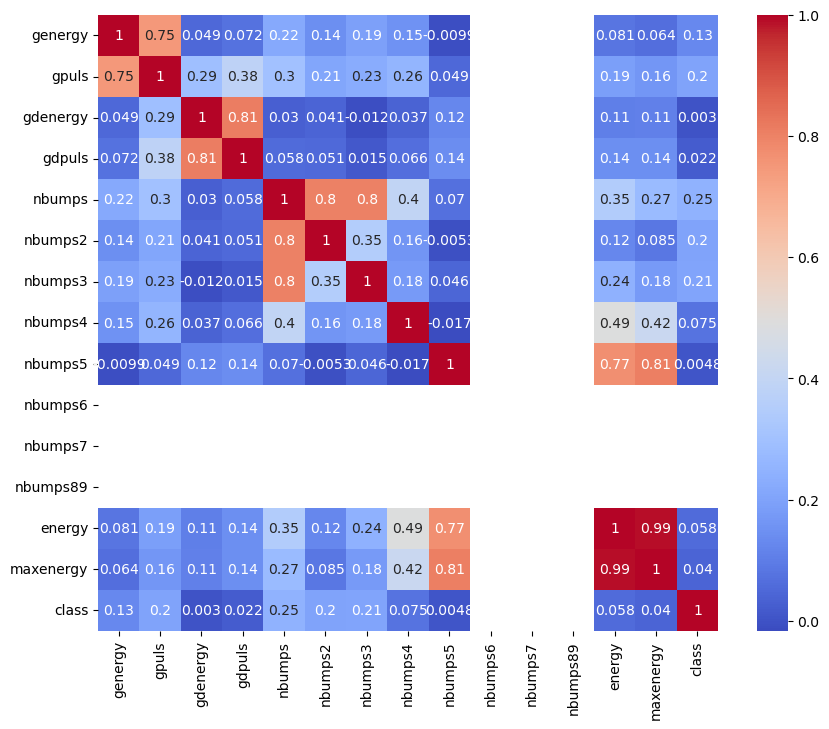

In [8]:
# Plot the correlation matrix for numerical features
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the correlation matrix, among the features that highly correlated with each others include:
- `energy` and `maxenergy` (0.99)
- `gdpuls` and `gdenergy` (0.81)
- `nbumps5` and `maxenergy` (0.81)
- `nbumps` and `nbumps2` (0.8)
- `nbumps` and `nbumps3` (0.8)
- `nbumps5` and `energy` (0.77)
- `gpuls` and `genergy` (0.75)

Features that do not show any correlation with other classes:
- `nbumps6`
- `nbumps7`
- `nbumps89`

These features can be dropped in the subsequent steps as they do not need to be involved in the model training.

**None of the features** show direct correlation with the target column, `class`.

`class` column can be dropped from numerical DataFrame `numerical_df` as it is a target column

In [9]:
# Drop the features that are not needed for the analysis
df.drop(['nbumps89', 'nbumps7', 'nbumps6'], axis=1, inplace=True)
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0


In [10]:
# Drop the features that are not needed for the analysis and the target variable
numerical_df.drop(['nbumps89', 'nbumps7', 'nbumps6', 'class'], axis=1, inplace=True)
numerical_df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,15180,48,-72,-72,0,0,0,0,0,0,0
1,14720,33,-70,-79,1,0,1,0,0,2000,2000
2,8050,30,-81,-78,0,0,0,0,0,0,0
3,28820,171,-23,40,1,0,1,0,0,3000,3000
4,12640,57,-63,-52,0,0,0,0,0,0,0


In [11]:
# Summarize the numerical features
numerical_df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,2600.000000,2000.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000


In [12]:
# Categorize the continuous features
continuous_df = numerical_df[["genergy", "gpuls", "gdenergy", "gdpuls", "energy", "maxenergy"]]
continuous_df.head()

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
0,15180,48,-72,-72,0,0
1,14720,33,-70,-79,2000,2000
2,8050,30,-81,-78,0,0
3,28820,171,-23,40,3000,3000
4,12640,57,-63,-52,0,0


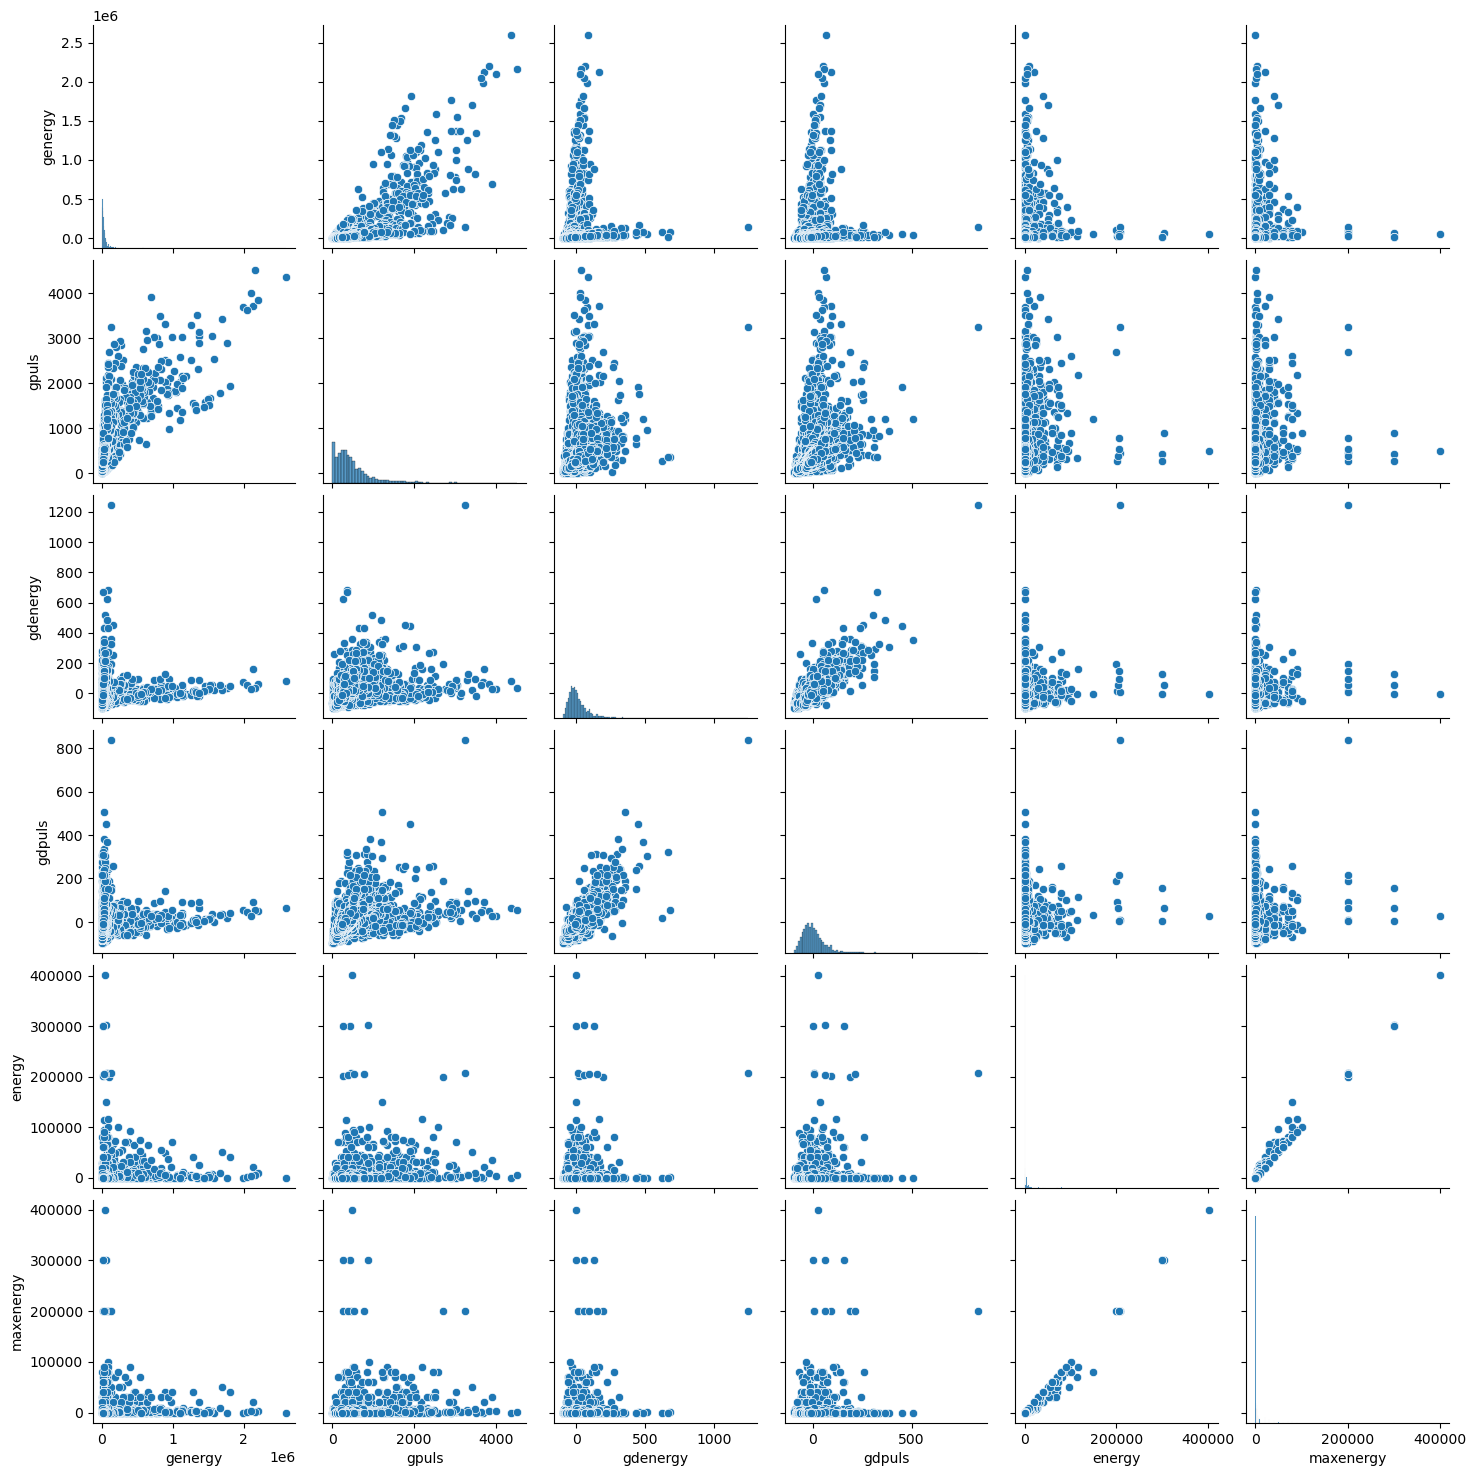

In [13]:
# Plot the distribution of continuous features
sns.pairplot(continuous_df, size = 2.5)
plt.show()

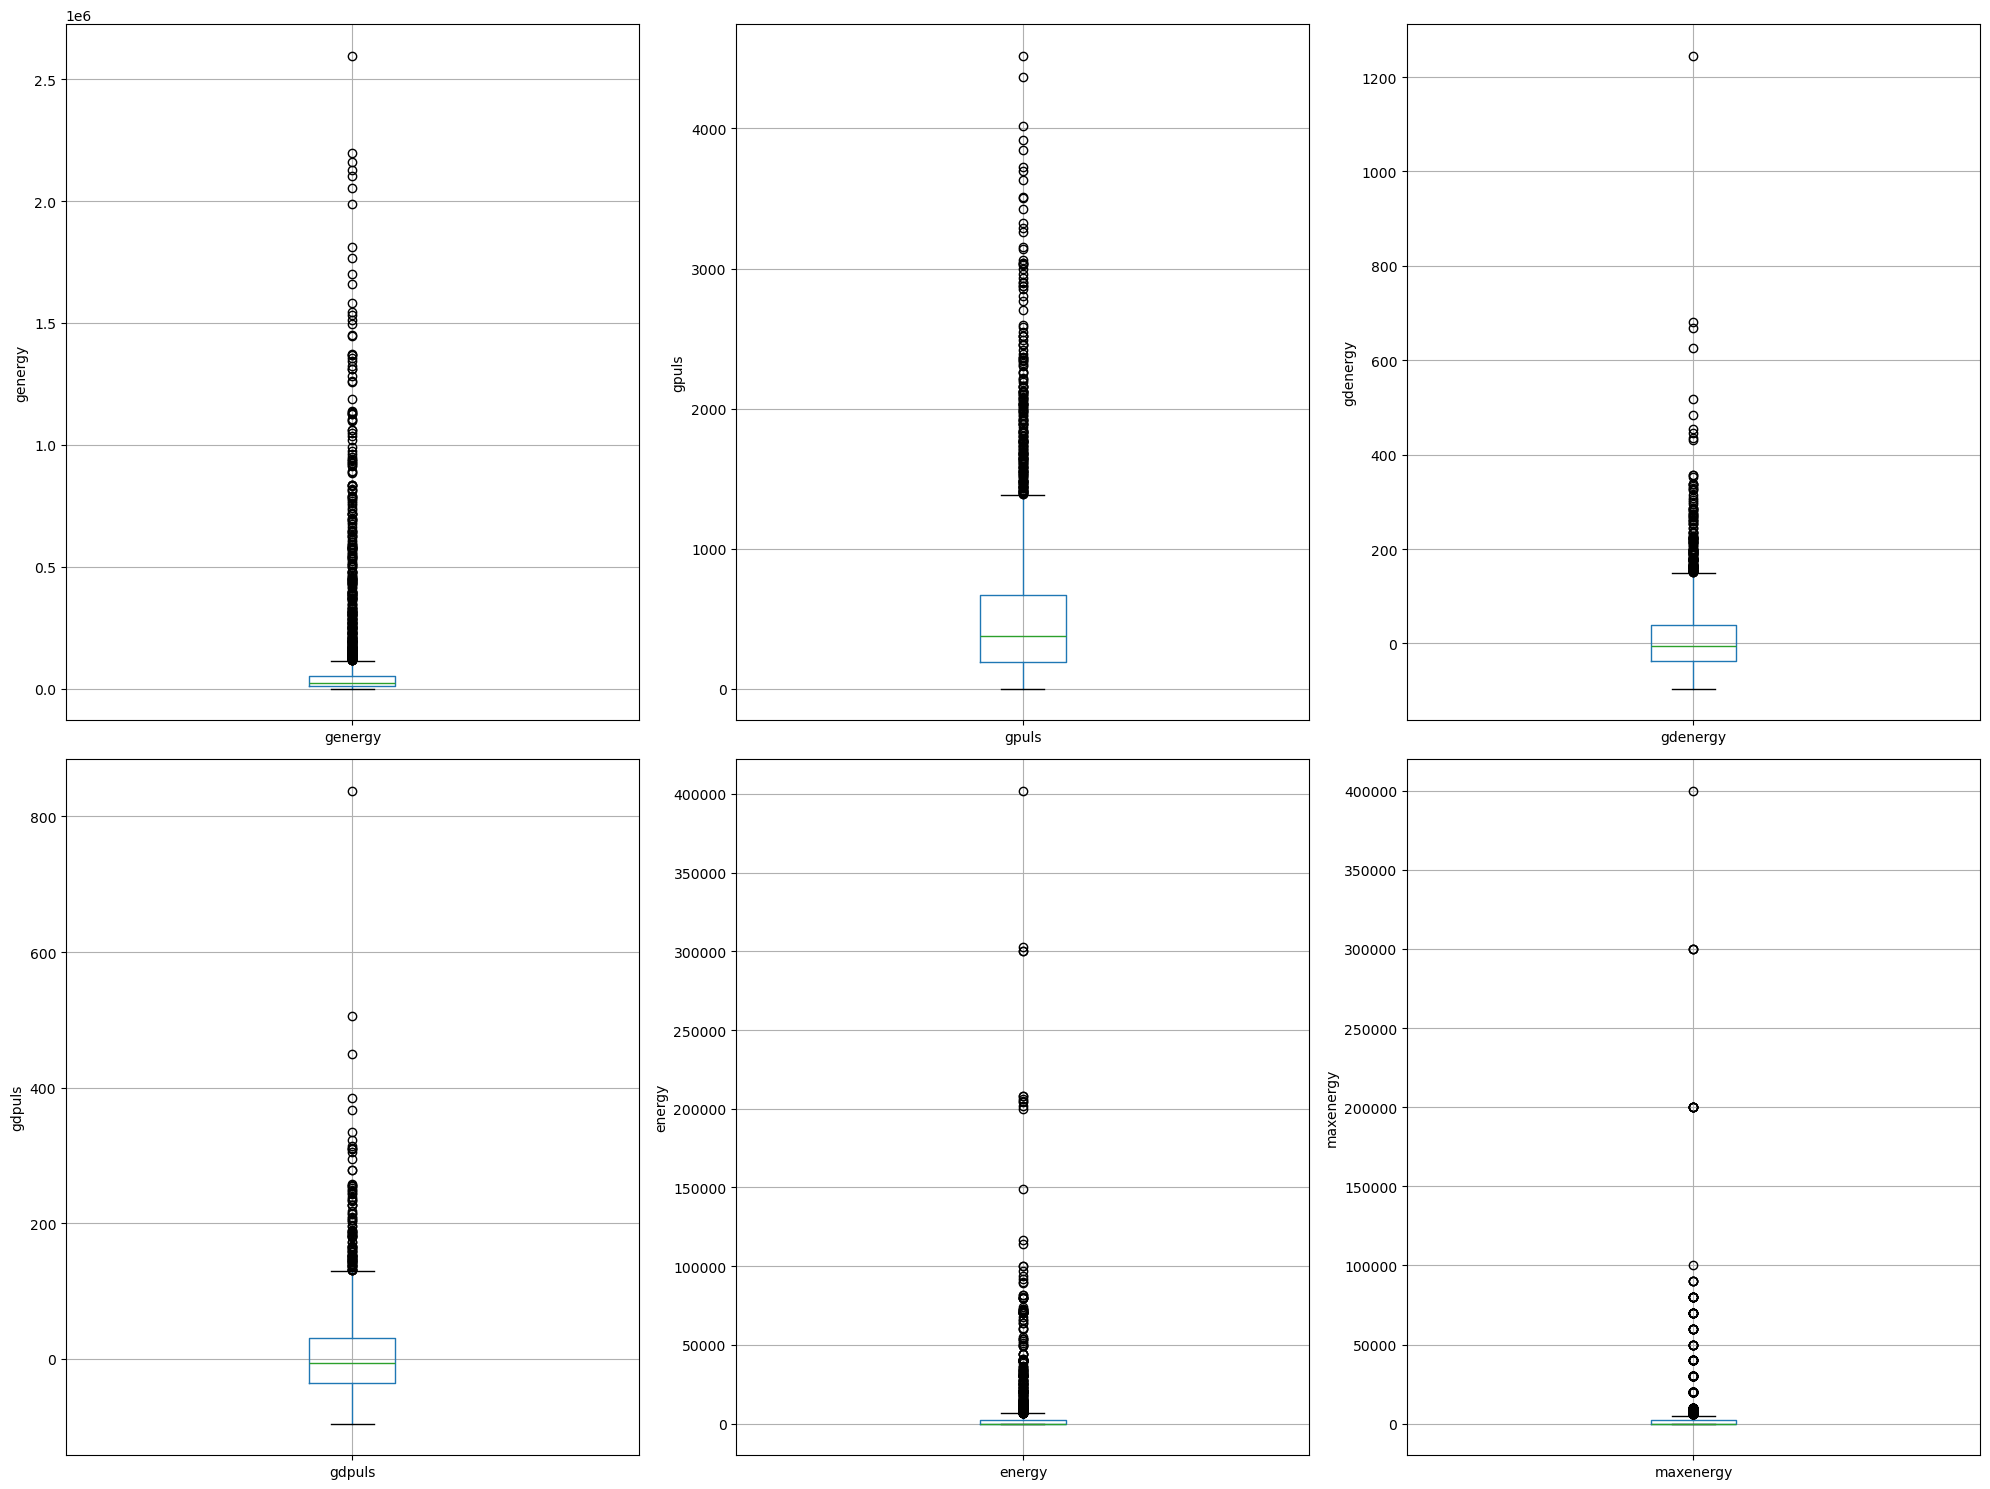

In [14]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through the columns and create subplots
for i, column in enumerate(continuous_df.columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
    fig = df.boxplot(column=column)
    fig.set_title('')
    fig.set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# remove the duplicated rows
df.drop_duplicates(keep='first', inplace=True)
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0


In [16]:
# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2573,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0
2574,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0
2575,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0
2576,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0
2577,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0


In [17]:
# Check for the dimensions of the DataFrame after data cleaning
df.shape

(2578, 16)

In [18]:
# Save the cleaned DataFrame
X = df.drop(columns=label).values
y = df[label].values

# Show the shape of the data
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (2578, 15)
y shape:  (2578,)


#### Split the dataset
Split the dataset into training, validation and test sets.

In [19]:
# Split the dataset into training, validation, and test sets
# Training : Validation : Test = 7 : 1 : 2

seed_num = 42

# Split the dataset into training and test sets
# test_size = 0.2 as (training dataset + validation dataset) : test dataset = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num,
  # stratify=y
)

# Split the training dataset into training and validation sets
# test_size = 0.125 as training dataset : validation dataset = 7 : 1
X_train, X_vald, y_train, y_vald = train_test_split(
  X_train,
  y_train,
  test_size=0.125,
  random_state=seed_num,
  # stratify=y_train
)

# Show the shape of the datasets
print("Original dataset shape:")
print("X shape:", X.shape, ", y shape:", y.shape, "\n")

print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)

Original dataset shape:
X shape: (2578, 15) , y shape: (2578,) 

Training set shape:
X_train shape: (1804, 15) , y_train shape: (1804,) 

Validation set shape:
X_vald shape: (258, 15) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 15) , y_test shape: (516,)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

This section outlines a comprehensive data preprocessing pipeline designed to prepare the Seismic Bumps Dataset for a classification task aimed at predicting whether a high-energy seismic bump will occur in the next shift.

The process includes **label encoding and data scaling**: ordinal categorical features are transformed using `Label Encoding,` while nominal features are encoded with `One-Hot Encoding`. Numerical features are scaled using the `Robust Scaler` to reduce the impact of outliers and skewed distributions. To address class imbalance, the `SMOTE (Synthetic Minority Over-sampling Technique)` is applied exclusively to the training set.

##### Label encoding & data scaling

Based on the column description, DataFrame consists of

Categorical data includes
- Ordinal: `seismic`, `seismoacoustic`, and `ghazard`
- Nominal: `shift`

and numerical data.

The data are encoded based on their categories:
- Ordinal categorical values using **Label Encoding**,
- Nominal categorical values using **One Hot Encoding**,
- and Numerical values using **Robust Scaler**

**Robust Scaler** is used instead of **MinMaxScaler** as seismic data often includes extreme value (e.g. sudden energy spikes, zero-heavy counts). RoubstScaler is typically safer as it is good for data that has outliers or heavy skew.

In [20]:
# Convert X_train to a DataFrame for scaling
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=label).columns)
X_vald_df = pd.DataFrame(X_vald, columns=df.drop(columns=label).columns)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=label).columns)

In [21]:
# Apply Label Encoding to the ordinal categorical columns
label_encoder = LabelEncoder()

for column in categorical_df.columns:
  if column != 'shift':
    # Transform the training, validation, and test sets
    X_train_df[column] = label_encoder.fit_transform(X_train_df[column])
    X_vald_df[column] = label_encoder.transform(X_vald_df[column])
    X_test_df[column] = label_encoder.transform(X_test_df[column])

In [22]:
# Apply One-Hot Encoding to the nominal categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

def onehot_encode_and_concat(df, column, onehot_encoder): 
    onehot_encoded = onehot_encoder.transform(df[[column]])
    onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([column]), index=df.index)
    df = df.drop(column, axis=1) # drop the original column
    return pd.concat([df, onehot_df], axis=1)

onehot_encoder.fit(X_train_df[['shift']])

# Transform the training, validation, and test sets
X_train_df = onehot_encode_and_concat(X_train_df, 'shift', onehot_encoder)
X_vald_df = onehot_encode_and_concat(X_vald_df, 'shift', onehot_encoder)
X_test_df = onehot_encode_and_concat(X_test_df, 'shift', onehot_encoder)

In [23]:
# Apply Robust Scaling to the numerical columns
numerical_scaler = RobustScaler()

# Transform the training, validation, and test sets
X_train_df[numerical_df.columns] = numerical_scaler.fit_transform(X_train_df[numerical_df.columns])
X_vald_df[numerical_df.columns] = numerical_scaler.transform(X_vald_df[numerical_df.columns])
X_test_df[numerical_df.columns] = numerical_scaler.transform(X_test_df[numerical_df.columns])

In [24]:
# Checkpoint the columns after encoding
columns_after_encoding = X_train_df.columns
columns_after_encoding

Index(['seismic', 'seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
       'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
       'energy', 'maxenergy', 'shift_N', 'shift_W'],
      dtype='object')

In [25]:
# Display the scaled columns of the training set
X_train_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.524304,-0.241362,-0.842105,-0.350365,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.346626,-0.226921,-0.342105,0.014599,1.0,0.0,1.0,0.0,0.0,0.357143,0.5
2,0.655498,-0.559051,-0.118421,-0.029197,3.0,2.0,1.0,0.0,0.0,0.607143,0.5
3,-0.412931,-0.162971,-0.105263,0.598540,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,-0.272770,0.059825,0.697368,0.510949,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [26]:
# Display the scaled columns of the validation set
X_vald_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,0.411279,0.507478,0.710526,0.467153,1.0,1.0,0.0,0.0,0.0,0.107143,0.15
1,0.342850,1.949458,1.631579,2.452555,2.0,2.0,0.0,0.0,0.0,0.392857,0.30
2,3.318075,2.853017,0.144737,0.379562,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
3,-0.534686,-0.528107,-0.894737,-0.905109,0.0,0.0,0.0,0.0,0.0,0.000000,0.00
4,0.543889,-0.631253,-0.618421,-0.656934,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


In [27]:
# Display the scaled columns of the test set
X_test_df[numerical_df.columns].head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,-0.592261,-0.767406,-1.039474,-1.109489,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,-0.328929,-0.101083,0.394737,0.802920,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.406796,-0.270242,0.368421,0.160584,3.0,0.0,3.0,0.0,0.0,1.428571,1.0
3,13.068429,4.051573,0.552632,0.686131,1.0,0.0,1.0,0.0,0.0,1.071429,1.5
4,-0.437471,-0.472408,-0.855263,-0.788321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


##### Oversampling
**SMOTE (Synthetic Minority Over-sampling Technique)**, is used for oversampling the minority class in imbalanced datasets. It is only introduced to training dataset to prevent the unrealistic samples and data leakage in validation dataset and test dataset.

In [28]:
# Oversampling
# SMOTE
smote = SMOTE(random_state=seed_num, sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train_df, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

X_train = X_smote
y_train = y_smote

Original dataset shape: Counter({0: 1694, 1: 110})
Resample dataset shape: Counter({0: 1694, 1: 1694})


In [29]:
# Convert back to a NumPy array
X_vald = X_vald_df.values
X_test = X_test_df.values

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature selection is then performed using the `SelectKBest` method with mutual information to retain the eight most informative variables.

The final output consists of clean, balanced, and scaled datasets, ready for model development and evaluation.

In [30]:
# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=8)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation and test sets using the same selector
X_vald = selector.transform(X_vald)
X_test = selector.transform(X_test)

# Get the feature names after encoding
selected_indices = selector.get_support(indices=True) # Get the indices of the selected features
selected_features = columns_after_encoding[selected_indices] # Get the names of the selected features
selected_features

Index(['gdenergy', 'gdpuls', 'nbumps', 'nbumps2', 'nbumps3', 'energy',
       'maxenergy', 'shift_N'],
      dtype='object')

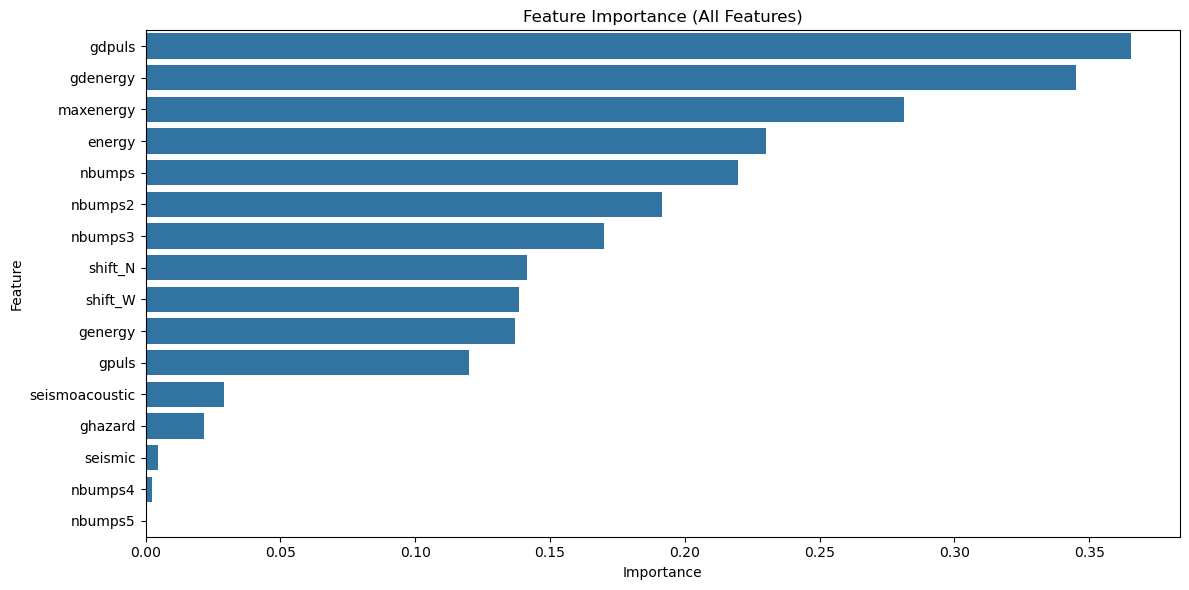

In [31]:
# Get all feature names BEFORE selection
all_feature_names = X_train_df.columns  # assuming x_train is a DataFrame

# Get all feature scores from the selector
all_scores = selector.scores_  # same length as original feature count

# Create a DataFrame of all features and their scores
feature_importances = pd.DataFrame({
    "feature": all_feature_names,
    "importance": all_scores
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Plot all features
plt.figure(figsize=(12, max(6, len(feature_importances) * 0.3)))  # dynamic height
sns.barplot(x="importance", y="feature", data=feature_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (All Features)")
plt.tight_layout()
plt.show()


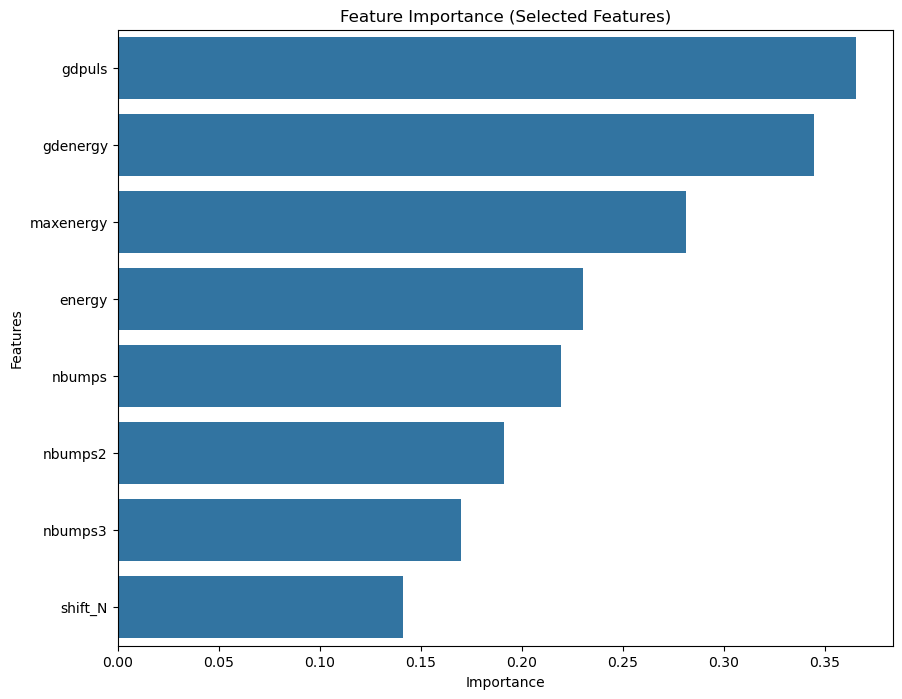

In [32]:
# Get the feature importances
# Get the indices of the selected features
importances = selector.scores_[selected_indices] # Get the scores of the selected features
feature_importances = pd.DataFrame({"feature": selected_features, "importance": importances}) # Create a DataFrame with feature names and their importances
feature_importances = feature_importances.sort_values("importance", ascending=False) # Sort the DataFrame by importance

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Selected Features)')
plt.show()

In [33]:
# Store the selected features back into the training set
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_train_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-0.842105,-0.350365,0.0,0.0,0.0,0.000000,0.0,1.0
1,-0.342105,0.014599,1.0,0.0,1.0,0.357143,0.5,0.0
2,-0.118421,-0.029197,3.0,2.0,1.0,0.607143,0.5,1.0
3,-0.105263,0.598540,0.0,0.0,0.0,0.000000,0.0,1.0
4,0.697368,0.510949,0.0,0.0,0.0,0.000000,0.0,1.0


In [34]:
# Store the selected features back into the validation set
X_vald_df = pd.DataFrame(X_vald, columns=selected_features)
X_vald_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,0.710526,0.467153,1.0,1.0,0.0,0.107143,0.15,0.0
1,1.631579,2.452555,2.0,2.0,0.0,0.392857,0.30,0.0
2,0.144737,0.379562,0.0,0.0,0.0,0.000000,0.00,0.0
3,-0.894737,-0.905109,0.0,0.0,0.0,0.000000,0.00,1.0
4,-0.618421,-0.656934,0.0,0.0,0.0,0.000000,0.00,1.0


In [35]:
# Store the selected features back into the test set
X_test_df = pd.DataFrame(X_test, columns=selected_features)
X_test_df.head()

,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,energy,maxenergy,shift_N
0,-1.039474,-1.109489,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.394737,0.802920,0.0,0.0,0.0,0.000000,0.0,1.0
2,0.368421,0.160584,3.0,0.0,3.0,1.428571,1.0,0.0
3,0.552632,0.686131,1.0,0.0,1.0,1.071429,1.5,0.0
4,-0.855263,-0.788321,0.0,0.0,0.0,0.000000,0.0,0.0


In [36]:
# Convert back to a NumPy array
X_train = X_train_df.values
X_vald = X_vald_df.values
X_test = X_test_df.values

In [37]:
# Check the shape of the datasets after oversampling
print("Training set shape:")
print("X_train shape:", X_train.shape, ", y_train shape:", y_train.shape)
print("X_train_df shape:", X_train_df.shape, ", y_train shape:", y_train.shape, "\n")

print("Validation set shape:")
print("X_vald shape:", X_vald.shape, ", y_vald shape:", y_vald.shape)
print("X_vald_df shape:", X_vald_df.shape, ", y_vald shape:", y_vald.shape, "\n")

print("Test set shape: ")
print("X_test shape:", X_test.shape, ", y_test shape:", y_test.shape)
print("X_test_df shape:", X_test_df.shape, ", y_test shape:", y_test.shape)

Training set shape:
X_train shape: (3388, 8) , y_train shape: (3388,)
X_train_df shape: (3388, 8) , y_train shape: (3388,) 

Validation set shape:
X_vald shape: (258, 8) , y_vald shape: (258,)
X_vald_df shape: (258, 8) , y_vald shape: (258,) 

Test set shape: 
X_test shape: (516, 8) , y_test shape: (516,)
X_test_df shape: (516, 8) , y_test shape: (516,)


#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

##### Support Vector Machine (SVM)

In [38]:
# Start writing here @goeychewhong

In [39]:
svm_best_model = None # @goeychewhong

##### Decision Tree Classifier (DTC)

In [40]:
# Start writing here @Jccc03

In [41]:
dtc_best_model = None # @Jccc03

##### K-Nearest Neighbour (KNN) 

In [42]:
# Start writing here @cshenglim0407

In [43]:
knn_best_model = None # @cshenglim0407

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate a model using multiple metrics
    """
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

In [45]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    Plot confusion matrix for a model
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [46]:
def compare_models(y_true, model1_pred, model2_pred, model3_pred, 
                  model1_name, model2_name, model3_name):
    """
    Compare three models using various metrics
    """
    # Calculate metrics for each model
    metrics1 = evaluate_model(y_true, model1_pred, model1_name)
    metrics2 = evaluate_model(y_true, model2_pred, model2_name)
    metrics3 = evaluate_model(y_true, model3_pred, model3_name)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame([metrics1, metrics2, metrics3])
    
    # Plot confusion matrices
    plot_confusion_matrix(y_true, model1_pred, model1_name)
    plot_confusion_matrix(y_true, model2_pred, model2_name)
    plot_confusion_matrix(y_true, model3_pred, model3_name)
    
    # Plot comparison bar chart
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    plt.bar(x - width, comparison_df[metrics_to_plot].iloc[0], width, label=model1_name)
    plt.bar(x, comparison_df[metrics_to_plot].iloc[1], width, label=model2_name)
    plt.bar(x + width, comparison_df[metrics_to_plot].iloc[2], width, label=model3_name)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Model Comparison')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    plt.show()
    
    # Print detailed classification reports
    print(f"\nClassification Report for {model1_name}:")
    print(classification_report(y_true, model1_pred))
    print(f"\nClassification Report for {model2_name}:")
    print(classification_report(y_true, model2_pred))
    print(f"\nClassification Report for {model3_name}:")
    print(classification_report(y_true, model3_pred))
    
    return comparison_df

##### Support Vector Machine (SVM)

In [47]:
y_pred_svm = svm_best_model.predict(X_vald)

AttributeError: 'NoneType' object has no attribute 'predict'

##### Decision Tree Classifier (DTC)

In [ ]:
y_pred_dtc = dtc_best_model.predict(X_vald)

##### K-Nearest Neighbour (KNN)

In [ ]:
y_pred_knn = knn_best_model.predict(X_test)

#### Model Comparison

In [48]:
# @WenHao1223 remember to remove this part

# Dummy data to test code for model comparison part
# y_test = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
# y_pred_svm = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])  # Example predictions
# y_pred_dtc = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])  # Example predictions
# y_pred_knn = np.array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0])  # Example predictions

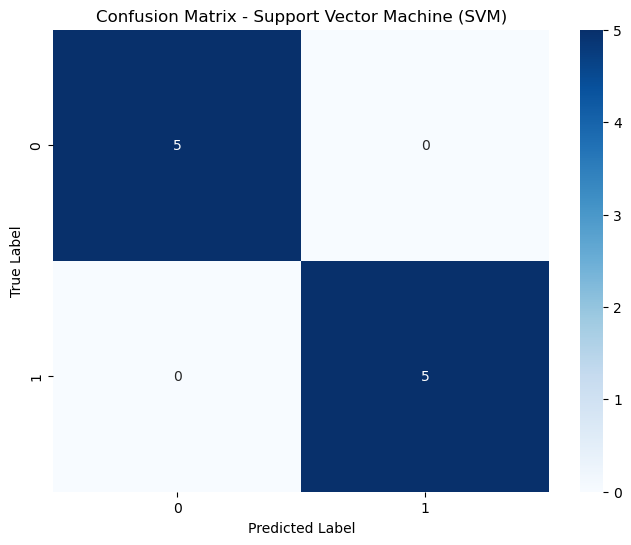

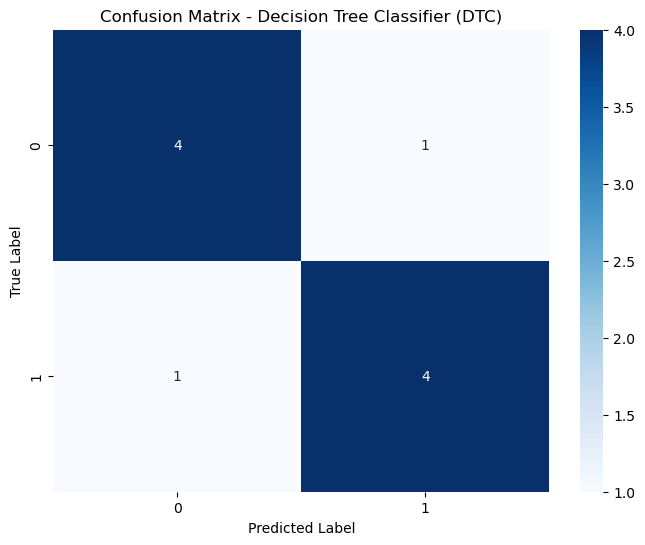

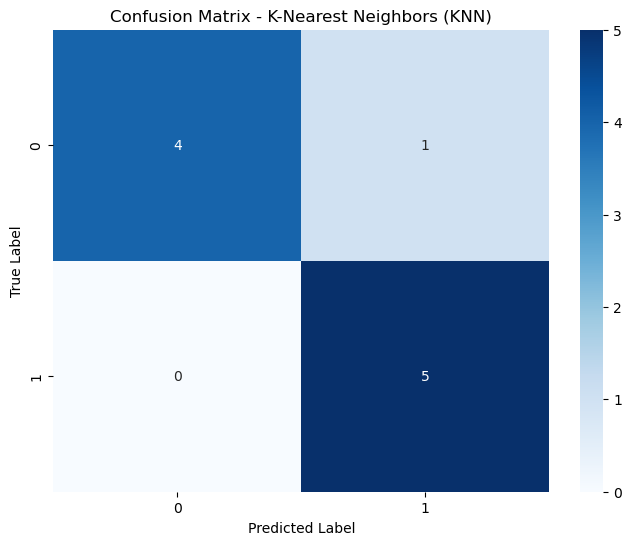

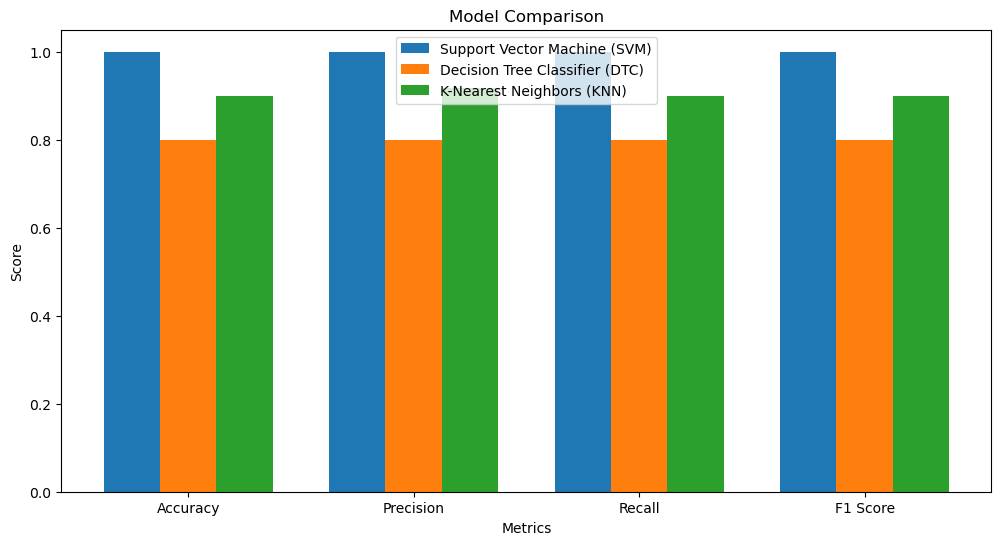


Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Classification Report for Decision Tree Classifier (DTC):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10


Classification Report for K-Nearest Neighbors (KNN):
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy

In [49]:
results = compare_models(
  y_test,
  y_pred_svm,
  y_pred_dtc,
  y_pred_knn,
  model1_name="Support Vector Machine (SVM)",
  model2_name="Decision Tree Classifier (DTC)",
  model3_name="K-Nearest Neighbors (KNN)"
)

In [50]:
# Print detailed results
print("\nDetailed Model Comparison:")
print(results.to_string(index=False))


Detailed Model Comparison:
                         Model  Accuracy  Precision  Recall  F1 Score
  Support Vector Machine (SVM)       1.0   1.000000     1.0   1.00000
Decision Tree Classifier (DTC)       0.8   0.800000     0.8   0.80000
     K-Nearest Neighbors (KNN)       0.9   0.916667     0.9   0.89899


Conclusion:
